# (D)DoS detection using NetTiSA flows

In [1]:
import pandas as pd
import numpy as np
import json
import collections

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import seaborn as sns

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

In [2]:
df = pd.read_csv("../final_datasets/dos.csv")
df

,Unnamed: 0,SRC_IP,DST_IP,SRC_PORT,DST_PORT,TIME_FIRST,TIME_LAST,LABEL,PACKETS,PACKETS_REV,...,ROOT_MEAN_SQUARE,KURTOSIS,TIME_DISTRIBUTION,MEAN_RELATIVE_TIME,DURATION,MEAN_DIFFTIMES,MIN_DIFFTIMES,MAX_DIFFTIMES,SWITCHING_METRIC,DIRECTIONS
0,0,192.168.100.148,192.168.100.7.,52732,80,1.528089e+09,1.528089e+09,True,5,0,...,208.710805,2.084944,0.214227,3.502377,16.348923,4.087231,0.000050,15.186176,1.000000,1.0
1,1,192.168.100.148,192.168.100.7.,52734,80,1.528089e+09,1.528089e+09,True,5,0,...,207.846578,2.099872,0.214224,3.502252,16.348542,4.087135,0.000089,15.186285,1.000000,1.0
2,2,192.168.100.148,192.168.100.7.,52736,80,1.528089e+09,1.528089e+09,True,5,0,...,201.373285,2.100675,0.214242,3.502457,16.348169,4.087042,0.000024,15.184317,1.000000,1.0
3,3,192.168.100.148,192.168.100.7.,52738,80,1.528089e+09,1.528089e+09,True,5,0,...,259.186805,2.087654,0.214134,3.498793,16.339294,4.084823,0.000022,15.184776,1.000000,1.0
4,4,192.168.100.148,192.168.100.7.,52740,80,1.528089e+09,1.528089e+09,True,5,0,...,228.217440,2.084431,0.214118,3.498479,16.339031,4.084758,0.000023,15.185822,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4009815,4009815,192.168.0.54.5,443,23.21.159.26.4,53175:,1.428917e+09,1.428917e+09,False,6,0,...,815.526313,1.064402,0.408343,0.185961,0.455405,0.091081,0.000149,0.188441,1.600000,NaN
4009816,4009816,192.168.0.54.5,53176,54.93.61.44.4,443:,1.428917e+09,1.428918e+09,False,11,0,...,201.183318,5.136262,0.097322,1.789601,18.388441,1.838844,0.000002,18.069654,1.200000,NaN
4009817,4009817,192.168.0.54.5,443,54.93.61.44.4,53176:,1.428917e+09,1.428917e+09,False,7,0,...,874.914363,1.133416,0.322692,0.085528,0.265044,0.044174,0.000089,0.151291,1.333333,NaN
4009818,4009818,192.168.0.54.5,53189,70.33.182.206.4,443:,1.428917e+09,1.428918e+09,False,13,0,...,231.869492,5.448111,0.095351,1.690053,17.724544,1.477045,0.000002,17.030356,1.000000,NaN


In [6]:
default_faetures = [
    "PACKETS",
    "PACKETS_REV",
    "BYTES",
    "BYTES_REV",
]

features = [
    "PACKETS",
    "PACKETS_REV",
    "BYTES",
    "BYTES_REV",
    "MEAN",
    "STDEV",
    "VAR",
    "BURSTINESS",
    "MIN",
    "MAX",
    "MIN_MINUS_MAX",
    "COEFFICIENT_OF_VARIATION",
    "AVERAGE_DISPERSION",
    "PERCENT_DEVIATION",
    "ROOT_MEAN_SQUARE",
    "KURTOSIS",
    "TIME_DISTRIBUTION",
    "MEAN_RELATIVE_TIME",
    "DURATION",
    "MEAN_DIFFTIMES",
    "MIN_DIFFTIMES",
    "MAX_DIFFTIMES",
    "SWITCHING_METRIC",
    "DIRECTIONS",
]

In [7]:
import sklearn
pd.set_option('display.max_columns', None)

df = df[["LABEL"] + features].copy()

df['LABEL'] = df.LABEL.astype('category')
df["LABEL_code"] = df["LABEL"].cat.codes


for F in features:
    df.replace([np.inf], 0, inplace=True)
    df.replace([-np.inf], 0, inplace=True)
    df.loc[df[F].isnull(), F] = 0

In [8]:
df

,LABEL,PACKETS,PACKETS_REV,BYTES,BYTES_REV,MEAN,STDEV,VAR,BURSTINESS,MIN,MAX,MIN_MINUS_MAX,COEFFICIENT_OF_VARIATION,AVERAGE_DISPERSION,PERCENT_DEVIATION,ROOT_MEAN_SQUARE,KURTOSIS,TIME_DISTRIBUTION,MEAN_SCALED_TIME,DURATION,MEAN_DIFFTIMES,MIN_DIFFTIMES,MAX_DIFFTIMES,SWITCHING_METRIC,DIRECTIONS,LABEL_code
0,True,5,0,391,0,138,174.859944,30576,0.117816,60,451,391,126.710104,125,90.579710,208.710805,2.084944,0.214227,3.502377,16.348923,4.087231,0.000050,15.186176,1.000000,1.0,1
1,True,5,0,389,0,137,173.965514,30265,0.118873,60,449,389,126.982127,124,90.510949,207.846578,2.099872,0.214224,3.502252,16.348542,4.087135,0.000089,15.186285,1.000000,1.0,1
2,True,5,0,374,0,134,167.257287,27976,0.110395,60,434,374,124.818871,119,88.805970,201.373285,2.100675,0.214242,3.502457,16.348169,4.087042,0.000024,15.184317,1.000000,1.0,1
3,True,5,0,507,0,161,226.735529,51410,0.169537,60,567,507,140.829521,162,100.621118,259.186805,2.087654,0.214134,3.498793,16.339294,4.084823,0.000022,15.184776,1.000000,1.0,1
4,True,5,0,436,0,147,194.984615,38019,0.140312,60,496,436,132.642595,139,94.557823,228.217440,2.084431,0.214118,3.498479,16.339031,4.084758,0.000023,15.185822,1.000000,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4009815,False,6,0,3349,0,558,651.336319,424239,0.077180,60,1460,1400,116.726939,552,98.924731,815.526313,1.064402,0.408343,0.185961,0.455405,0.091081,0.000149,0.188441,1.600000,0.0,0
4009816,False,11,0,1492,0,135,155.836453,24285,0.071643,60,561,501,115.434409,109,80.740741,201.183318,5.136262,0.097322,1.789601,18.388441,1.838844,0.000002,18.069654,1.200000,0.0,0
4009817,False,7,0,4646,0,663,615.725588,379118,-0.036970,60,1460,1400,92.869621,491,74.057315,874.914363,1.133416,0.322692,0.085528,0.265044,0.044174,0.000089,0.151291,1.333333,0.0,0
4009818,False,13,0,1891,0,145,187.938820,35321,0.128969,60,685,625,129.612979,131,90.344828,231.869492,5.448111,0.095351,1.690053,17.724544,1.477045,0.000002,17.030356,1.000000,0.0,0


In [9]:
print(f"ddos: {len(df[df['LABEL'] == True])}\tclear: {len(df[df['LABEL'] == False])}")

ddos: 60963	clear: 3948857


In [10]:
df = df[["LABEL_code"] + features].copy()

In [11]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

df = clean_dataset(df)

In [12]:
df.shape

(4009820, 25)

In [13]:
print(f"ddos: {len(df[df['LABEL_code'] == 1])}\tclear: {len(df[df['LABEL_code'] == 0])}")

ddos: 60963	clear: 3948857


In [14]:
df_validation = df.sample(n = 1000000)
df_features =  df[~df.isin(df_validation)].dropna()

In [15]:
df_features

,LABEL_code,PACKETS,PACKETS_REV,BYTES,BYTES_REV,MEAN,STDEV,VAR,BURSTINESS,MIN,MAX,MIN_MINUS_MAX,COEFFICIENT_OF_VARIATION,AVERAGE_DISPERSION,PERCENT_DEVIATION,ROOT_MEAN_SQUARE,KURTOSIS,TIME_DISTRIBUTION,MEAN_SCALED_TIME,DURATION,MEAN_DIFFTIMES,MIN_DIFFTIMES,MAX_DIFFTIMES,SWITCHING_METRIC,DIRECTIONS
0,1.0,5.0,0.0,391.0,0.0,138.0,174.859944,30576.0,0.117816,60.0,451.0,391.0,126.710104,125.0,90.579710,208.710805,2.084944,0.214227,3.502377,16.348923,4.087231,0.000050,15.186176,1.000000,1.0
1,1.0,5.0,0.0,389.0,0.0,137.0,173.965514,30265.0,0.118873,60.0,449.0,389.0,126.982127,124.0,90.510949,207.846578,2.099872,0.214224,3.502252,16.348542,4.087135,0.000089,15.186285,1.000000,1.0
2,1.0,5.0,0.0,374.0,0.0,134.0,167.257287,27976.0,0.110395,60.0,434.0,374.0,124.818871,119.0,88.805970,201.373285,2.100675,0.214242,3.502457,16.348169,4.087042,0.000024,15.184317,1.000000,1.0
3,1.0,5.0,0.0,507.0,0.0,161.0,226.735529,51410.0,0.169537,60.0,567.0,507.0,140.829521,162.0,100.621118,259.186805,2.087654,0.214134,3.498793,16.339294,4.084823,0.000022,15.184776,1.000000,1.0
8,1.0,5.0,0.0,424.0,0.0,144.0,189.618037,35956.0,0.136737,60.0,484.0,424.0,131.679192,135.0,93.750000,223.004933,2.098222,0.214155,3.498842,16.337881,4.084470,0.000021,15.181687,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4009814,0.0,10.0,0.0,1448.0,0.0,144.0,144.927568,21005.0,0.003210,60.0,417.0,357.0,100.644145,118.0,81.944444,199.677240,2.125238,0.113597,2.089148,18.390824,2.043425,0.000008,17.802590,1.333333,0.0
4009815,0.0,6.0,0.0,3349.0,0.0,558.0,651.336319,424239.0,0.077180,60.0,1460.0,1400.0,116.726939,552.0,98.924731,815.526313,1.064402,0.408343,0.185961,0.455405,0.091081,0.000149,0.188441,1.600000,0.0
4009816,0.0,11.0,0.0,1492.0,0.0,135.0,155.836453,24285.0,0.071643,60.0,561.0,501.0,115.434409,109.0,80.740741,201.183318,5.136262,0.097322,1.789601,18.388441,1.838844,0.000002,18.069654,1.200000,0.0
4009817,0.0,7.0,0.0,4646.0,0.0,663.0,615.725588,379118.0,-0.036970,60.0,1460.0,1400.0,92.869621,491.0,74.057315,874.914363,1.133416,0.322692,0.085528,0.265044,0.044174,0.000089,0.151291,1.333333,0.0


In [16]:
def get_confusion_matrix(y_test, y_pred):
    # Get and reshape confusion matrix data
    matrix = confusion_matrix(y_test, y_pred)
    percentage_matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
    return matrix, percentage_matrix

def plot_confusion_matrix(matrix, percentage_matrix, model=""):
    # Build the plot
    fig, ax = plt.subplots(1, 2,figsize=(15,5))
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, annot_kws={'size':10}, fmt='g',
                cmap=plt.cm.Greens, linewidths=0.2, ax=ax[0])
    sns.heatmap(percentage_matrix, annot=True, annot_kws={'size':10}, fmt='g',
                cmap=plt.cm.Greens, linewidths=0.2, ax=ax[1])
    # Add labels to the plot
    plt.tick_params(axis='both', which='minor', labelsize=5)
    # tick_marks = np.arange(len(classifications_array)) + 0.5
    # plt.xticks(tick_marks, classifications_array, rotation=85)
    # plt.yticks(tick_marks, classifications_array, rotation=0)
    ax[0].set_xlabel('Predicted label')
    ax[0].set_ylabel('True label')
    ax[0].set_title(f'Absolute Confusion Matrix for {model}')
    ax[1].set_xlabel('Predicted label')
    ax[1].set_ylabel('True label')
    ax[1].set_title(f'Relative Confusion Matrix for {model}')
    # pyplot.savefig("ddos_timeseries_plugin_classification.eps", format="eps")
    plt.show()

In [25]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import mean_absolute_error

def tunne_together_XGBoost_classification(df_tunne, _features, verbose=True):
    X=df_tunne[_features]  # Features
    y=df_tunne['LABEL_code']  # Labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify=y)
    
    def objective(space):
        clf = XGBClassifier(
                        n_estimators = int(space['n_estimators']), max_depth = int(space['max_depth']), gamma = space['gamma'],
                        reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                        colsample_bytree=int(space['colsample_bytree']), 
                        # subsample=int(space['subsample']),
                        # eta=space['eta'],
                            )

        evaluation = [( X_train, y_train), ( X_test, y_test)]

        clf.fit(X_train, y_train,
                eval_set=evaluation, eval_metric="auc",
                early_stopping_rounds=10,verbose=False)

        pred = clf.predict(X_test)
        # accuracy = mean_absolute_error(y_test, pred)
        # accuracy = accuracy_score(y_test, pred)
        accuracy = f1_score(y_test, pred)
        if verbose is True:
            print ("SCORE:", accuracy)
        return {'loss': -accuracy, 'status': STATUS_OK }
    
    space={'max_depth': hp.quniform("max_depth", 10, 100, 10),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 0,90,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0, 1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 20, 1),
        'n_estimators': hp.quniform('n_estimators', 100, 600, 100),
        # 'subsample': hp.quniform('subsample', 3, 20, 1),
        # 'eta': hp.quniform('eta', 0.005, 0.3, 0.005),
        'seed': 0
    }
    
    trials = Trials()
    
    best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)
        
    print("The best hyperparameters are : ","\n")
    print(best_hyperparams)
    return best_hyperparams

In [26]:
best_hyperparams = tunne_together_XGBoost_classification(df_features, features, verbose=False)

100%|██████████| 100/100 [24:24<00:00, 14.65s/trial, best loss: -0.9874003599897145]
The best hyperparameters are :  

{'colsample_bytree': 0.8892560110351545, 'gamma': 5.772917148166079, 'max_depth': 30.0, 'min_child_weight': 0.0, 'n_estimators': 400.0, 'reg_alpha': 9.0, 'reg_lambda': 0.3007896377660837}


In [27]:
def while_XGBoost_classification_tunned(best_hyperparams, cycles=100):
    X=df_features[features]  # Features
    y=df_features['LABEL_code']  # Labels
    best_results = (0,"",None,None, None)
    i = 0
    print(f"\r{i}", end="")
    for i in range(cycles):
        print(f"\r{i}", end="", flush=True)
        tmp_f1 = 0
        tmp_str = ""
        #Split on train and test
        X_train_a, X_test_a, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y) # 70% training and 30% test
        for F, N in zip(
                [ features], # statistics_features, time_features, distribution_features, frequency_features, behavior_features, 
                [ "All"], # "Statistical-based", "Time-based", "Distribution-based",  "Frequency-based",  "Behavior-based", 
        ):
                X_train = X_train_a[F]
                X_test = X_test_a[F] 
                model = XGBClassifier(
                        n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
                        reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
                        colsample_bytree=int(best_hyperparams['colsample_bytree']),
                        # subsample=int(best_hyperparams['subsample']),
                        # eta=best_hyperparams['eta'],
                )
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                accuracy = metrics.accuracy_score(y_test, y_pred)  * 100
                precision = precision_score(y_test, y_pred)  * 100
                recall = recall_score(y_test, y_pred)  * 100
                F1 = f1_score(y_test, y_pred)  * 100
                if N == "All":
                    tmp_str += "\multirow{-6}{*}{\\rotatebox{90}{\centering \\textbf{Our approach}}} & \cellcolor{Gray} \\textbf{All} & \\rowcolor{LigthGray}" 
                    tmp_str += "{:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(accuracy,precision,recall,F1)
                    tmp_str += "\n"
                    tmp_str += "\hline"
                    tmp_str += "\n"
                    tmp_f1 = F1
                elif N in ["Statistical-based", "Distribution-based", "Behavior-based"]:
                    tmp_str += "& \cellcolor{Gray} \\textbf{"
                    tmp_str += N
                    tmp_str += "} & " 
                    tmp_str += "{:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(accuracy,precision,recall,F1)
                    tmp_str += "\n"
                    tmp_str += "\cline{2-6}"
                    tmp_str += "\n"
                else:
                    tmp_str += "& \cellcolor{Gray} \\textbf{"
                    tmp_str += N
                    tmp_str += "} & \\rowcolor{LigthGray} " 
                    tmp_str += "{:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(accuracy,precision,recall,F1)
                    tmp_str += "\n"
                    tmp_str += "\cline{2-6}"
                    tmp_str += "\n"
        if best_results[0] < tmp_f1:
            matrix, percentage_matrix = get_confusion_matrix(y_test, y_pred)
            best_results = (tmp_f1, tmp_str, matrix, percentage_matrix, model)
    print("")
    print("")
    print("")
    print(best_results[0])
    print(best_results[1])
    plot_confusion_matrix(best_results[2], best_results[3], model="XGBoost")
    return best_results[4]

4


99.99273783587509
\multirow{-6}{*}{\rotatebox{90}{\centering \textbf{Our approach}}} & \cellcolor{Gray} \textbf{All} & \rowcolor{LigthGray}100.00 & 100.00 & 99.99 & 99.99 \\
\hline



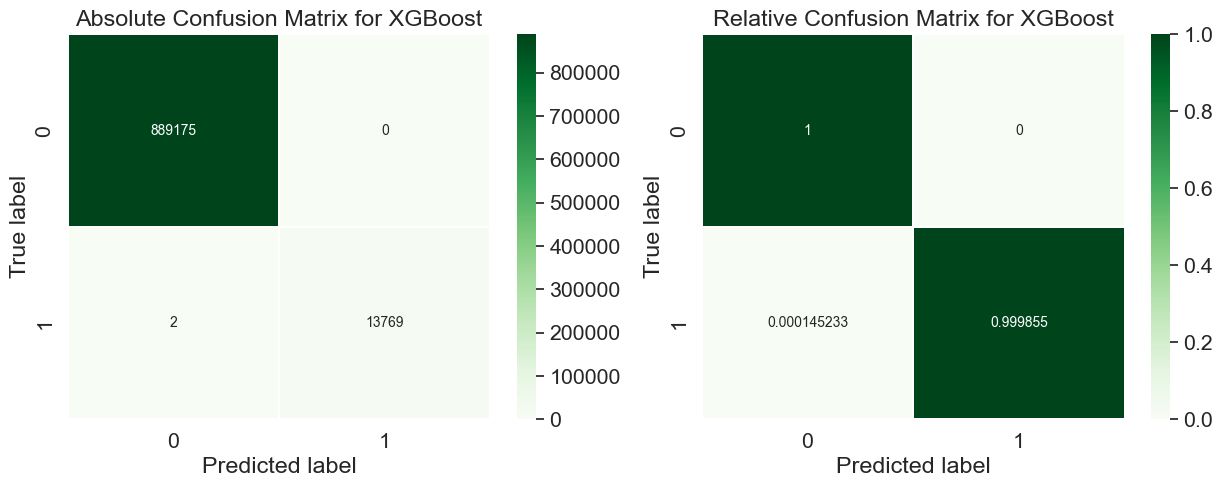

In [28]:
best_model = while_XGBoost_classification_tunned(best_hyperparams, cycles=5)

# Validation

\multirow{-6}{*}{\rotatebox{90}{\centering \textbf{Our approach}}} & \cellcolor{Gray} \textbf{All} & \rowcolor{LigthGray}100.00 & 100.00 & 99.96 & 99.98 \\
\hline



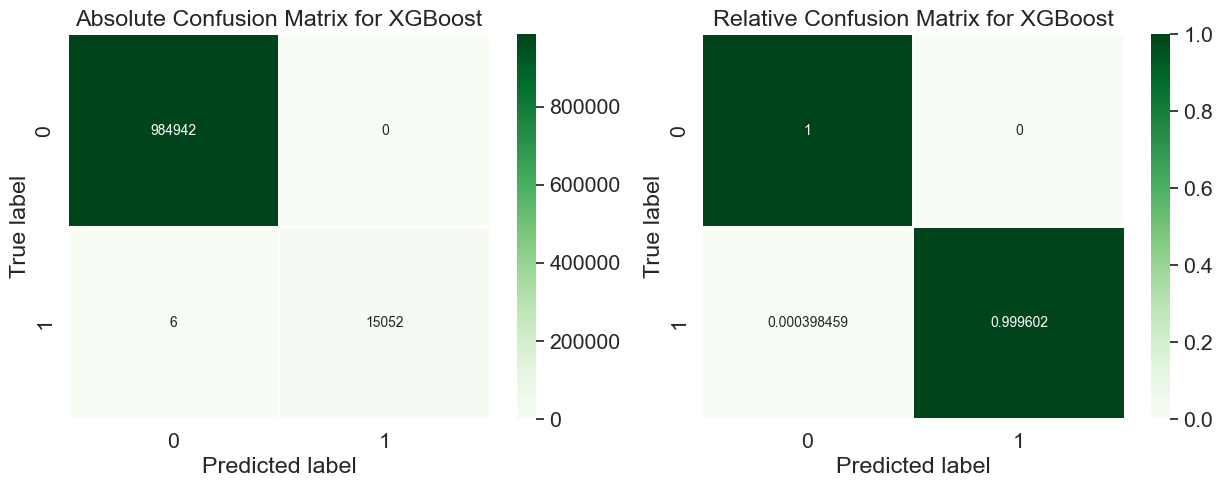

In [29]:
X_validation=df_validation[features]  # Features
y_validation=df_validation['LABEL_code']  # Labels
    

y_pred = best_model.predict(X_validation)
accuracy = metrics.accuracy_score(y_validation, y_pred)  * 100
precision = precision_score(y_validation, y_pred)  * 100
recall = recall_score(y_validation, y_pred)  * 100
F1 = f1_score(y_validation, y_pred)  * 100
                
tmp_str = ""
tmp_str += "\multirow{-6}{*}{\\rotatebox{90}{\centering \\textbf{Our approach}}} & \cellcolor{Gray} \\textbf{All} & \\rowcolor{LigthGray}" 
tmp_str += "{:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(accuracy,precision,recall,F1)
tmp_str += "\n"
tmp_str += "\hline"
tmp_str += "\n"
print(tmp_str)

matrix, percentage_matrix = get_confusion_matrix(y_validation, y_pred)
plot_confusion_matrix(matrix, percentage_matrix, model="XGBoost")

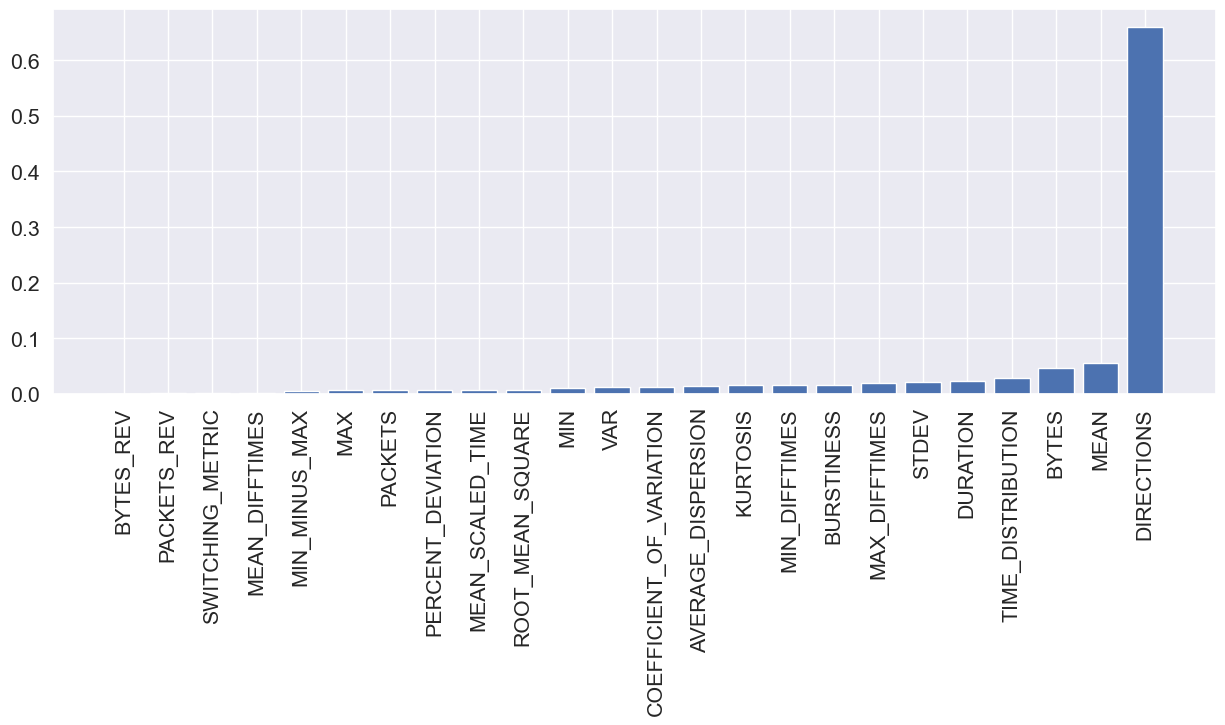

In [30]:
feat_importances = pd.Series(best_model.feature_importances_, index = X_validation.columns).sort_values(ascending = True)
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(feat_importances.keys(), feat_importances.values)
plt.xticks(rotation = 90)
plt.show()

In [31]:
feat_importances.to_dict()

{'BYTES_REV': 0.0,
 'PACKETS_REV': 0.0016906323144212365,
 'SWITCHING_METRIC': 0.002417940879240632,
 'MEAN_DIFFTIMES': 0.0024587593507021666,
 'MIN_MINUS_MAX': 0.005001407582312822,
 'MAX': 0.006424000021070242,
 'PACKETS': 0.0068610189482569695,
 'PERCENT_DEVIATION': 0.0070038135163486,
 'MEAN_SCALED_TIME': 0.0071461317129433155,
 'ROOT_MEAN_SQUARE': 0.00785993691533804,
 'MIN': 0.01153042633086443,
 'VAR': 0.011849421076476574,
 'COEFFICIENT_OF_VARIATION': 0.013152495957911015,
 'AVERAGE_DISPERSION': 0.01433573942631483,
 'KURTOSIS': 0.01588221825659275,
 'MIN_DIFFTIMES': 0.015911292284727097,
 'BURSTINESS': 0.01624230667948723,
 'MAX_DIFFTIMES': 0.01993512362241745,
 'STDEV': 0.02152824029326439,
 'DURATION': 0.023286661133170128,
 'TIME_DISTRIBUTION': 0.0280500128865242,
 'BYTES': 0.046824801713228226,
 'MEAN': 0.055785078555345535,
 'DIRECTIONS': 0.6588224768638611}